In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Input, BatchNormalization
from tensorflow.keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_curve, auc
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical

In [21]:
def load_data():
  train_data = pd.read_csv('../pretprocesiranje/train_data.csv')
  test_data = pd.read_csv('../pretprocesiranje/test_data.csv')
  X_train = train_data.iloc[:, :-1].copy()
  y_train = train_data.iloc[:, -1:].copy()
  X_test = test_data.iloc[:, :-1].copy()
  y_test = test_data.iloc[:, -1:].copy()

  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

  X_train = np.array(X_train)
  y_train = np.array(y_train)
  X_val = np.array(X_val)
  y_val = np.array(y_val)
  X_test = np.array(X_test)
  y_test = np.array(y_test)

  return X_train, X_val, y_train, y_val, X_test, y_test

In [22]:
def create_and_describe(inputs, outputs):
  model = Model(inputs=inputs, outputs=outputs)

  # fixed parameters
  model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

  model.summary()

  return model

In [23]:
def model_fit(X_train, y_train, X_test, y_test, batch_size, epochs, model):

  losses = []
  accuracies = []
  val_losses = []
  val_accuracies = []

  history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
  )
  losses.extend(history.history['loss'])
  accuracies.extend(history.history['accuracy'])
  val_losses.extend(history.history['val_loss'])
  val_accuracies.extend(history.history['val_accuracy'])

  return losses, accuracies, val_losses, val_accuracies

In [24]:
def plot_metrics(losses, accuracies, val_losses, val_accuracies):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

  #losses
  ax1.plot(losses, label='Training Loss')
  ax1.plot(val_losses, label='Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.set_title('Training and Validation Loss')
  ax1.legend()

  #accuracies
  ax2.plot(accuracies, label='Training Accuracy')
  ax2.plot(val_accuracies, label='Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.set_title('Training and Validation Accuracy')
  ax2.legend()

  plt.tight_layout()
  plt.show()

In [25]:
def baseline_model(size, batch_size, epochs, X_train, y_train, X_test, y_test):
  input_dim = X_train.shape[1]
  inputs = Input(shape=(input_dim,), name="input")
  x = Dense(size, activation='relu', name="first_layer")(inputs)
  outputs = Dense(3, activation='softmax', name="predictions")(x)

  baseline_model = create_and_describe(inputs=inputs, outputs=outputs)

  losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_test, y_test, batch_size=batch_size, epochs=epochs, model=baseline_model)

  all_losses.append(losses)
  all_accuracies.append(accuracies)
  all_val_losses.append(val_losses)
  all_val_accuracies.append(val_accuracies)

In [26]:
def plot_batch(all_losses, all_accuracies, all_val_losses, all_val_accuracies):
  plt.figure(figsize=(10, 8))

  batch_sizes = [32, 64, 128]
  # training loss
  plt.subplot(2, 2, 1)
  for i in range(len(batch_sizes)):
      plt.plot(all_losses[i], label=f'Training - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training Loss')

  # training accuracy
  plt.subplot(2, 2, 2)
  for i in range(len(batch_sizes)):
      plt.plot(all_accuracies[i], label=f'Training - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')
  plt.legend()

  # validation loss
  plt.subplot(2, 2, 3)
  for i in range(len(batch_sizes)):
      plt.plot(all_val_losses[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Validation Loss')
  plt.legend()

  # validation accuracy
  plt.subplot(2, 2, 4)
  for i in range(len(batch_sizes)):
      plt.plot(all_val_accuracies[i], label=f'Validation - Batch Size: {batch_sizes[i]}')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Validation Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [27]:
X_train, X_val, y_train, y_val, X_test, y_test = load_data()

In [28]:
compare_loss = []
compare_val_loss = []
compare_accuracy = []
compare_val_accuracy = []

#**Multilayer Perceptron**

#Baseline Model i izbor batch size hiperparametra

In [29]:
all_losses = []
all_accuracies = []
all_val_losses = []
all_val_accuracies = []

In [30]:
baseline_model(size=64, batch_size=32, epochs=10, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 64)                512064    
                                                                 
 predictions (Dense)         (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
213/213 [==============================] - 2s 8ms/step - loss: 0.9868 - accuracy: 0.5296 - val_loss: 0.8039 - val_accuracy: 0.6949
Epoch 2/10
213/213 [==============================] - 2s 7ms/step - loss: 0.6075 - accuracy: 0.7875 - val_loss: 0.6308 - val_accuracy: 0.7367
Epoch 3/10
213/213 [=============

In [31]:
baseline_model(size=64, batch_size=64, epochs=10, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 64)                512064    
                                                                 
 predictions (Dense)         (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
107/107 [==============================] - 2s 14ms/step - loss: 1.0262 - accuracy: 0.4835 - val_loss: 0.9134 - val_accuracy: 0.6549
Epoch 2/10
107/107 [==============================] - 1s 11ms/step - loss: 0.7435 - accuracy: 0.7561 - val_loss: 0.7007 - val_accuracy: 0.7261
Epoch 3/10
107/107 [===========

In [32]:
baseline_model(size=64, batch_size=128, epochs=10, X_train=X_train, y_train=y_train, X_test=X_val, y_test=y_val)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 64)                512064    
                                                                 
 predictions (Dense)         (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
54/54 [==============================] - 2s 30ms/step - loss: 1.0578 - accuracy: 0.4286 - val_loss: 0.9964 - val_accuracy: 0.5071
Epoch 2/10
54/54 [==============================] - 1s 18ms/step - loss: 0.8971 - accuracy: 0.6349 - val_loss: 0.8450 - val_accuracy: 0.6808
Epoch 3/10
54/54 [=================

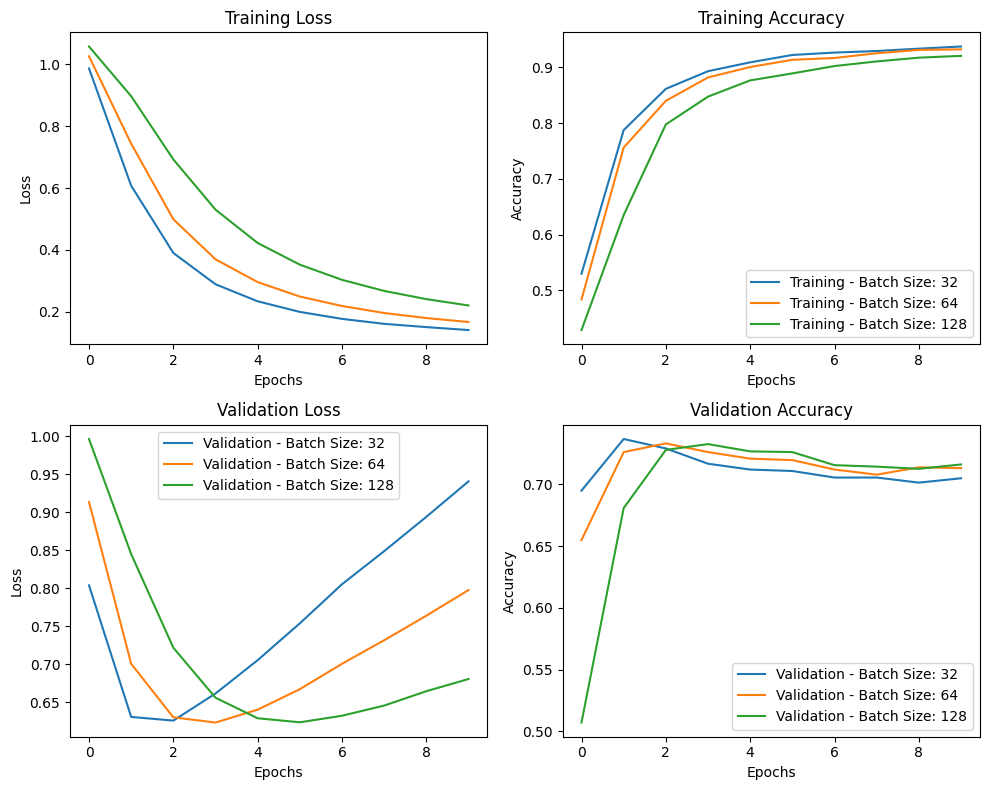

In [33]:
plot_batch(all_losses, all_accuracies, all_val_losses, all_val_accuracies)

overfit svuda, najbolje za 128: najsporije raste loss i najmanja je razlika izmedju tacnosti na trening i validacionom skupu

In [34]:
compare_loss.append(all_losses[1][-1])
compare_val_loss.append(all_val_losses[1][-1])
compare_accuracy.append(all_accuracies[1][-1])
compare_val_accuracy.append(all_val_accuracies[1][-1])

#Regularizacija smanjenjem broja neurona

In [35]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="input")
x = Dense(32, activation='relu', name="first_layer")(inputs)
outputs = Dense(3, activation='softmax', name="predictions")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 32)                256032    
                                                                 
 predictions (Dense)         (None, 3)                 99        
                                                                 
Total params: 256,131
Trainable params: 256,131
Non-trainable params: 0
_________________________________________________________________


In [36]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=reg_model)

Epoch 1/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0704 - accuracy: 0.4249 - val_loss: 1.0270 - val_accuracy: 0.4576
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 0.9597 - accuracy: 0.5517 - val_loss: 0.9227 - val_accuracy: 0.6078
Epoch 3/10
54/54 [==============================] - 1s 16ms/step - loss: 0.8124 - accuracy: 0.7252 - val_loss: 0.8155 - val_accuracy: 0.6967
Epoch 4/10
54/54 [==============================] - 1s 16ms/step - loss: 0.6674 - accuracy: 0.8118 - val_loss: 0.7322 - val_accuracy: 0.7226
Epoch 5/10
54/54 [==============================] - 1s 15ms/step - loss: 0.5492 - accuracy: 0.8483 - val_loss: 0.6780 - val_accuracy: 0.7261
Epoch 6/10
54/54 [==============================] - 1s 16ms/step - loss: 0.4620 - accuracy: 0.8697 - val_loss: 0.6465 - val_accuracy: 0.7261
Epoch 7/10
54/54 [==============================] - 1s 10ms/step - loss: 0.3984 - accuracy: 0.8887 - val_loss: 0.6313 - val_accuracy: 0.7179
Epoch 8/10
54

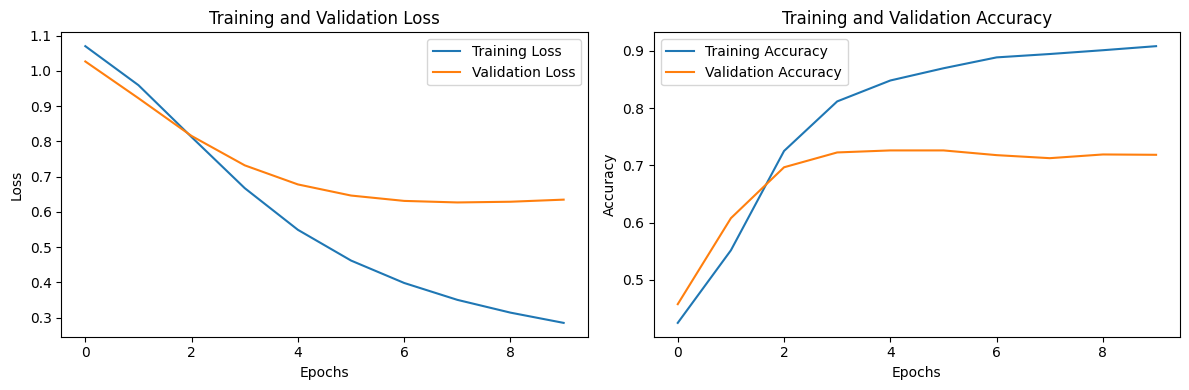

In [37]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [38]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#Deep network

(ilustrativno, da se uverimo da ne treba jos kompleksniji model od pocetnog)

In [39]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="input")
x = Dense(64, activation='relu', name="first_layer")(inputs)
x = Dense(32, activation='relu', name="second_layer")(x)
x = Dense(32, activation='relu', name="third_layer")(x)
outputs = Dense(3, activation='softmax', name="predictions")(x)

dp_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 64)                512064    
                                                                 
 second_layer (Dense)        (None, 32)                2080      
                                                                 
 third_layer (Dense)         (None, 32)                1056      
                                                                 
 predictions (Dense)         (None, 3)                 99        
                                                                 
Total params: 515,299
Trainable params: 515,299
Non-trainable params: 0
_________________________________________________________________


In [40]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=dp_model)

Epoch 1/10
54/54 [==============================] - 2s 21ms/step - loss: 1.0597 - accuracy: 0.4177 - val_loss: 0.9859 - val_accuracy: 0.4352
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 0.7978 - accuracy: 0.6580 - val_loss: 0.6780 - val_accuracy: 0.7332
Epoch 3/10
54/54 [==============================] - 1s 15ms/step - loss: 0.4083 - accuracy: 0.8557 - val_loss: 0.6768 - val_accuracy: 0.7256
Epoch 4/10
54/54 [==============================] - 1s 19ms/step - loss: 0.2477 - accuracy: 0.9032 - val_loss: 0.7589 - val_accuracy: 0.7161
Epoch 5/10
54/54 [==============================] - 1s 24ms/step - loss: 0.1889 - accuracy: 0.9199 - val_loss: 0.8537 - val_accuracy: 0.7173
Epoch 6/10
54/54 [==============================] - 1s 24ms/step - loss: 0.1594 - accuracy: 0.9277 - val_loss: 0.9182 - val_accuracy: 0.7120
Epoch 7/10
54/54 [==============================] - 1s 23ms/step - loss: 0.1393 - accuracy: 0.9367 - val_loss: 1.0093 - val_accuracy: 0.7091
Epoch 8/10
54

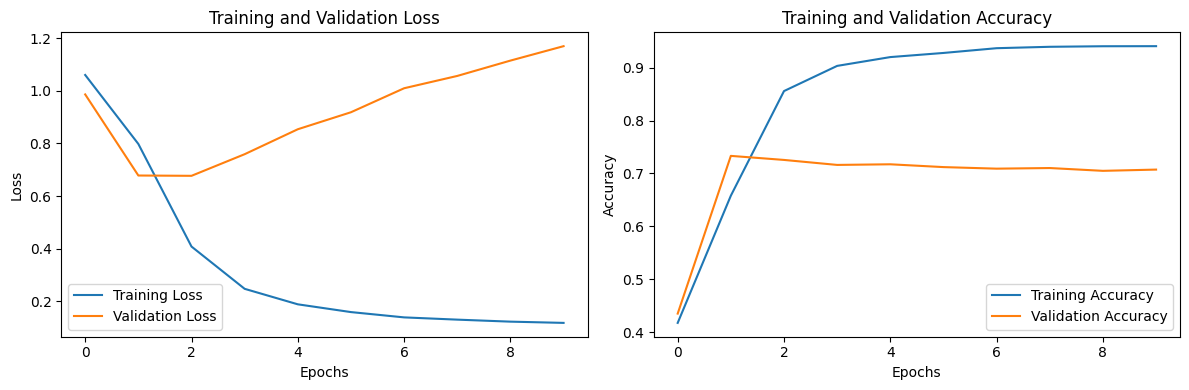

In [41]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [42]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#L2 regularizacija

ravnomernije rasporedjivanje tezina po granama


In [43]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="input")
x = Dense(64, activation='relu', name="L2_regularized_layer", kernel_regularizer=regularizers.l2(0.01))(inputs)
outputs = Dense(3, activation='softmax', name="predictions")(x)

l2_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 L2_regularized_layer (Dense  (None, 64)               512064    
 )                                                               
                                                                 
 predictions (Dense)         (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [44]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=l2_model)

Epoch 1/10
54/54 [==============================] - 1s 19ms/step - loss: 1.2754 - accuracy: 0.4161 - val_loss: 1.0687 - val_accuracy: 0.4229
Epoch 2/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0644 - accuracy: 0.4352 - val_loss: 1.0613 - val_accuracy: 0.4912
Epoch 3/10
54/54 [==============================] - 1s 15ms/step - loss: 1.0590 - accuracy: 0.4929 - val_loss: 1.0560 - val_accuracy: 0.4741
Epoch 4/10
54/54 [==============================] - 1s 15ms/step - loss: 1.0530 - accuracy: 0.4954 - val_loss: 1.0491 - val_accuracy: 0.5165
Epoch 5/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0455 - accuracy: 0.5499 - val_loss: 1.0426 - val_accuracy: 0.5512
Epoch 6/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0377 - accuracy: 0.5608 - val_loss: 1.0351 - val_accuracy: 0.5736
Epoch 7/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0288 - accuracy: 0.5844 - val_loss: 1.0270 - val_accuracy: 0.5801
Epoch 8/10
54

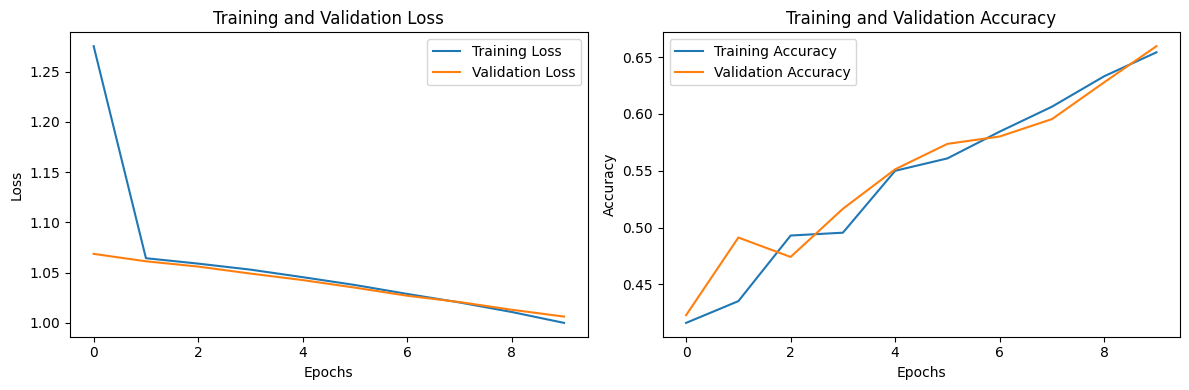

In [45]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

bolje, mada sad se malo teze snalazi i tacnost nece nastaviti da raste


In [46]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#Dropout regularizacija

izbacivanje 50% nasumicnih neurona u svakoj iteraciji

In [47]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="input")
x = Dense(64, activation='relu', name="first_layer")(inputs)
x = Dropout(0.5, name="dropout_layer")(x)
outputs = Dense(3, activation='softmax', name="predictions")(x)

dropout_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 64)                512064    
                                                                 
 dropout_layer (Dropout)     (None, 64)                0         
                                                                 
 predictions (Dense)         (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [48]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=dropout_model)

Epoch 1/10
54/54 [==============================] - 1s 18ms/step - loss: 1.0758 - accuracy: 0.4349 - val_loss: 1.0398 - val_accuracy: 0.4529
Epoch 2/10
54/54 [==============================] - 1s 15ms/step - loss: 0.9820 - accuracy: 0.5376 - val_loss: 0.9334 - val_accuracy: 0.6378
Epoch 3/10
54/54 [==============================] - 1s 25ms/step - loss: 0.8317 - accuracy: 0.7190 - val_loss: 0.8086 - val_accuracy: 0.7055
Epoch 4/10
54/54 [==============================] - 1s 14ms/step - loss: 0.6749 - accuracy: 0.7938 - val_loss: 0.7160 - val_accuracy: 0.7326
Epoch 5/10
54/54 [==============================] - 1s 16ms/step - loss: 0.5619 - accuracy: 0.8256 - val_loss: 0.6617 - val_accuracy: 0.7362
Epoch 6/10
54/54 [==============================] - 1s 15ms/step - loss: 0.4798 - accuracy: 0.8485 - val_loss: 0.6332 - val_accuracy: 0.7385
Epoch 7/10
54/54 [==============================] - 1s 15ms/step - loss: 0.4163 - accuracy: 0.8647 - val_loss: 0.6213 - val_accuracy: 0.7373
Epoch 8/10
54

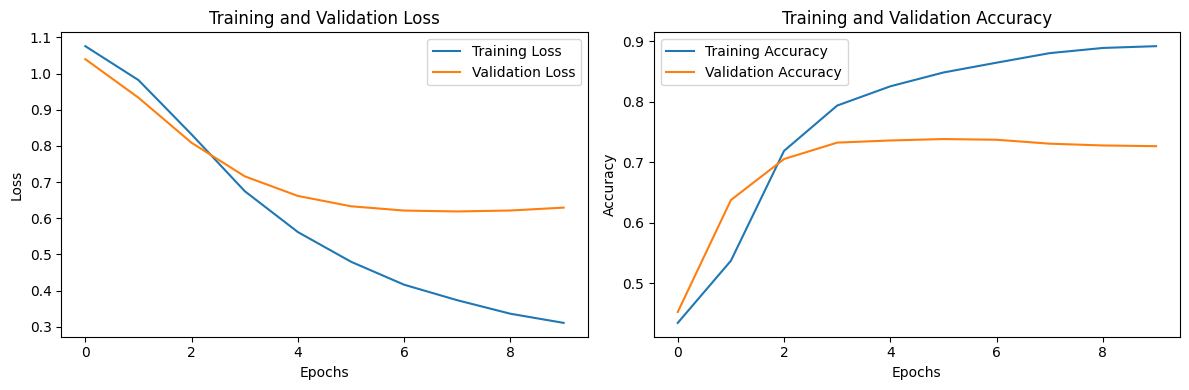

In [49]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [50]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

#L2 + Dropout

In [51]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="input")
x = Dense(64, activation='relu', name="L2_regularized_layer", kernel_regularizer=regularizers.l2(0.01))(inputs)
x = Dropout(0.5, name="dropout_layer")(x)
outputs = Dense(3, activation='softmax', name="predictions")(x)

reg_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 L2_regularized_layer (Dense  (None, 64)               512064    
 )                                                               
                                                                 
 dropout_layer (Dropout)     (None, 64)                0         
                                                                 
 predictions (Dense)         (None, 3)                 195       
                                                                 
Total params: 512,259
Trainable params: 512,259
Non-trainable params: 0
_________________________________________________________________


In [52]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=reg_model)

Epoch 1/10
54/54 [==============================] - 2s 29ms/step - loss: 1.2822 - accuracy: 0.4110 - val_loss: 1.0779 - val_accuracy: 0.4181
Epoch 2/10
54/54 [==============================] - 1s 17ms/step - loss: 1.0733 - accuracy: 0.4194 - val_loss: 1.0710 - val_accuracy: 0.4187
Epoch 3/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0711 - accuracy: 0.4423 - val_loss: 1.0689 - val_accuracy: 0.4346
Epoch 4/10
54/54 [==============================] - 1s 17ms/step - loss: 1.0674 - accuracy: 0.4490 - val_loss: 1.0658 - val_accuracy: 0.4482
Epoch 5/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0647 - accuracy: 0.4906 - val_loss: 1.0623 - val_accuracy: 0.4723
Epoch 6/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0609 - accuracy: 0.4969 - val_loss: 1.0584 - val_accuracy: 0.5135
Epoch 7/10
54/54 [==============================] - 1s 16ms/step - loss: 1.0536 - accuracy: 0.5430 - val_loss: 1.0538 - val_accuracy: 0.5448
Epoch 8/10
54

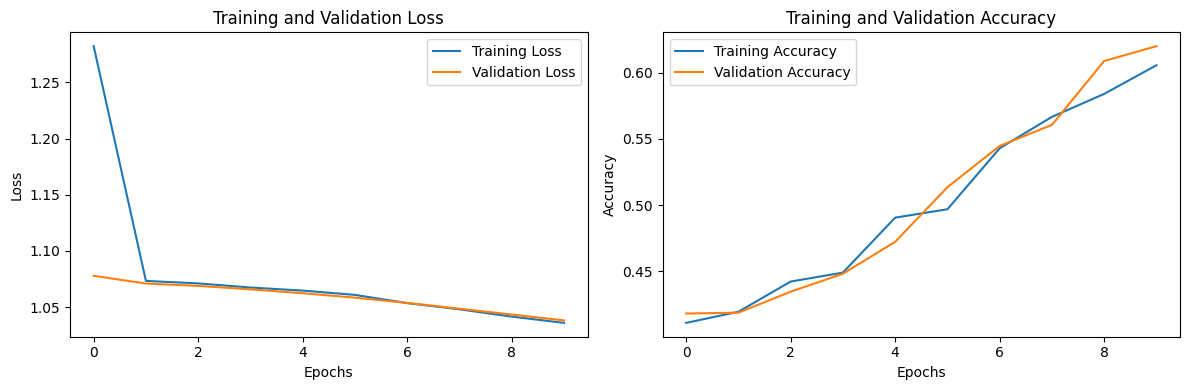

In [53]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [54]:
compare_loss.append(losses[-1])
compare_val_loss.append(val_losses[-1])
compare_accuracy.append(accuracies[-1])
compare_val_accuracy.append(val_accuracies[-1])

<Figure size 800x600 with 0 Axes>

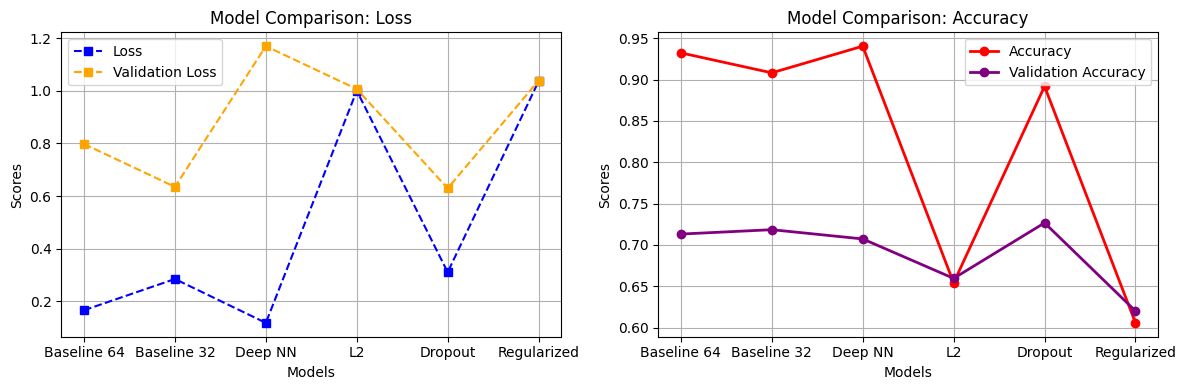

In [55]:
model_names = ['Baseline 64', 'Baseline 32', 'Deep NN', 'L2', 'Dropout', 'Regularized']
plt.figure(figsize=(8, 6))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(model_names, compare_loss, marker='s', linestyle='--', color='blue', label='Loss')
ax1.plot(model_names, compare_val_loss, marker='s', linestyle='--', color='orange', label='Validation Loss')
ax1.set_xlabel('Models')
ax1.set_ylabel('Scores')
ax1.set_title('Model Comparison: Loss')
ax1.legend()
ax1.grid(True)


ax2.plot(model_names, compare_accuracy, marker='o', linestyle='-', linewidth=2, color='red', label='Accuracy')
ax2.plot(model_names, compare_val_accuracy, marker='o', linestyle='-', linewidth=2, color='purple', label='Validation Accuracy')
ax2.set_xlabel('Models')
ax2.set_ylabel('Scores')
ax2.set_title('Model Comparison: Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()

plt.show()

-------------------najbolja arhitektura-------------------

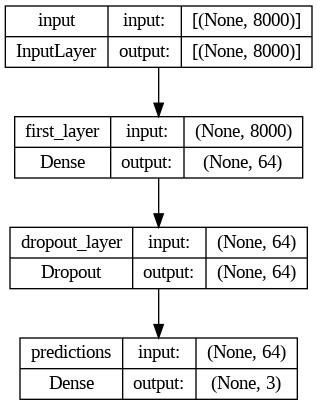

In [56]:
plot_model(dropout_model,show_shapes=True)

#Test skup

dropout + smanjenje broja neurona

In [87]:
input_dim = X_train.shape[1]
inputs = Input(shape=(input_dim,), name="input")
x = Dense(20, activation='relu', name="first_layer")(inputs)
x = Dropout(0.5, name="dropout_layer")(x)
outputs = Dense(3, activation='softmax', name="predictions")(x)

final_model = create_and_describe(inputs=inputs, outputs=outputs)

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 8000)]            0         
                                                                 
 first_layer (Dense)         (None, 20)                160020    
                                                                 
 dropout_layer (Dropout)     (None, 20)                0         
                                                                 
 predictions (Dense)         (None, 3)                 63        
                                                                 
Total params: 160,083
Trainable params: 160,083
Non-trainable params: 0
_________________________________________________________________


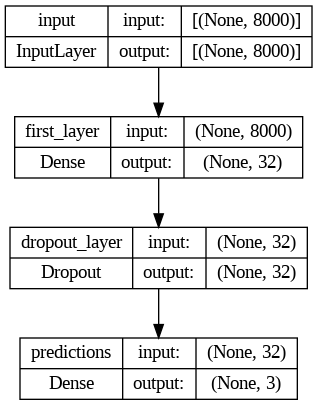

In [83]:
plot_model(final_model,show_shapes=True)

In [88]:
losses, accuracies, val_losses, val_accuracies = model_fit(X_train, y_train, X_val, y_val, batch_size=128, epochs=10, model=final_model)

Epoch 1/10
54/54 [==============================] - 2s 20ms/step - loss: 1.0842 - accuracy: 0.4267 - val_loss: 1.0624 - val_accuracy: 0.4429
Epoch 2/10
54/54 [==============================] - 0s 9ms/step - loss: 1.0339 - accuracy: 0.4947 - val_loss: 1.0072 - val_accuracy: 0.5442
Epoch 3/10
54/54 [==============================] - 0s 9ms/step - loss: 0.9564 - accuracy: 0.6218 - val_loss: 0.9411 - val_accuracy: 0.6231
Epoch 4/10
54/54 [==============================] - 0s 9ms/step - loss: 0.8707 - accuracy: 0.6892 - val_loss: 0.8730 - val_accuracy: 0.6902
Epoch 5/10
54/54 [==============================] - 0s 8ms/step - loss: 0.7829 - accuracy: 0.7415 - val_loss: 0.8092 - val_accuracy: 0.7097
Epoch 6/10
54/54 [==============================] - 0s 9ms/step - loss: 0.7105 - accuracy: 0.7658 - val_loss: 0.7583 - val_accuracy: 0.7226
Epoch 7/10
54/54 [==============================] - 0s 8ms/step - loss: 0.6464 - accuracy: 0.7909 - val_loss: 0.7182 - val_accuracy: 0.7303
Epoch 8/10
54/54 [=

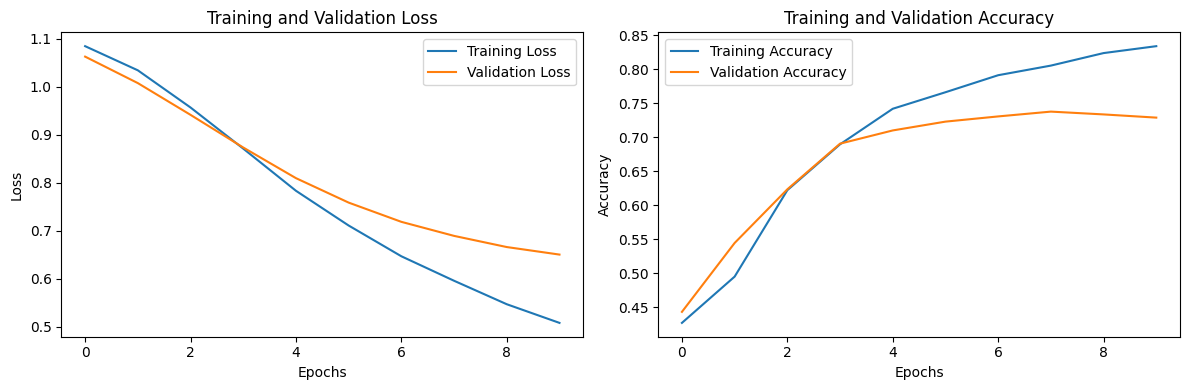

In [89]:
plot_metrics(losses, accuracies, val_losses, val_accuracies)

In [90]:
test_scores = final_model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

50/50 - 0s - loss: 0.4742 - accuracy: 0.8380 - 118ms/epoch - 2ms/step
Test loss: 0.474152535200119
Test accuracy: 0.8379571437835693


In [91]:
final_model.save('nn_model.h5')